# Robert Bennett - 5/11/2020 - rbennett0721@gmail.com
## Datasets used:
### http://genomics.senescence.info/download.html
Longevity Dataset - A list of genes and gene variants that are associated with human longevity, identified as significant/non-significant, and associated with populations and PubMed IDs.
### http://ageing-map.org/
Ageing Atlas Dataset - A collection of age related changes across different biological levels (molecular, physiological, psychological, and pathological) and species, which includes various information included from the studies they're associated with.

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Folder path goes here
path = "C:/INSERT/FOLDER/PATH/"

# Changed delimiter to tab and set the index to the first column
allChanges = pd.read_csv(path + "digital_ageing_atlas_data.txt", sep = "\t", index_col = 0)
# Set index to the first column
longevity = pd.read_csv(path + "longevity.csv", index_col = 0)

## Outputting the entire Longevity dataset

In [2]:
# Just here so I can uncomment and display all data
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

longevity

,Association,Population,Variants,Genes,PubMed,Unnamed: 6
id,,,,,,
1,non-significant,Dutch,HLA-B40,HLA-B,1859103,NaN
2,non-significant,Dutch,HLA-DRB5,HLA-DRB5,1859103,NaN
3,non-significant,Finnish,APOB,APOB,8018664,NaN
4,significant,Finnish,APOC3,APOC3,8018664,NaN
5,significant,Finnish,E2/E3/E4,APOE,8018664,NaN
...,...,...,...,...,...,...
555,significant,Chinese,E4,UBE4B,24746514,NaN
556,significant,American (Caucasian),rs1042714,ADRB2,20399803,NaN
557,non-significant,American (Caucasian),NaN,TP53,20824210,NaN


## Cleaning data

In [3]:
# Selected only genes deemed significant
signif = longevity[longevity["Association"] == "significant"]
# Dropped this because it was an empty column
signif = signif.drop(columns = ["Unnamed: 6"])
# Removed entries with multiple genes
signif = signif[~signif.Genes.str.contains(',', na = False)]

# Just here so I can uncomment and display all data
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

signif

,Association,Population,Variants,Genes,PubMed
id,,,,,
4,significant,Finnish,APOC3,APOC3,8018664
5,significant,Finnish,E2/E3/E4,APOE,8018664
6,significant,French,I/D,ACE,8136829
8,significant,Finnish,APOB,APOB,8155090
9,significant,Finnish,E2/E3/E4,APOE,8155090
...,...,...,...,...,...
G544,significant,Danish,"rs10861197,rs10861203,rs17202060,rs4445711,rs4...",TXNRD1,24462499
551,significant,Italian,Hinf347,APOA4,9622284
555,significant,Chinese,E4,UBE4B,24746514


## Outputting the entire Ageing Atlas dataset

In [4]:
# Just here so I can uncomment and display all data
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

allChanges

,Change_name,Change_type,Species,Gender,Age_start,Age_end,Description,Tissues,Gene,Properties,...,Process_measured,Sample_size,Method_of_collection,Data_transforms,Percentage_change,P_value,Coefficiant,Intercept,Relationship_parent_identifiers,References
Identifier,,,,,,,,,,,,,,,,,,,,,
DAA1359,4-aminobutyrate aminotransferase,molecular,Mus musculus,male/female,3.0,23.0,NaN,Hematological System,Abat (4-aminobutyrate aminotransferase),NaN,...,Gene Expression Level,20,Microarray,Log2,45.0,0.0002766321860853940000000,NaN,NaN,NaN,"2882: Rossi et al. (2005) ""Cell intrinsic alte..."
DAA318,5'-3' exoribonuclease 1,molecular,Homo sapiens,male/female,20.0,75.0,NaN,Skeletal Muscle,ERI1 (exoribonuclease 1),NaN,...,Gene Expression Level,0,Microarray,Log,4.0,0.0001311467447210450000000,NaN,NaN,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
DAA1973,5-hmC increase in cerebrellum,molecular,Mus musculus,male/female,1.0,24.0,5' hydroxymethyl cytosine (5-hmC) increases fr...,Cerebellum,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2818: Szulwach et al. (2011) ""5-hmC-mediated e..."
DAA350,"5'-nucleotidase, cytosolic II",molecular,Homo sapiens,male/female,20.0,75.0,NaN,Skeletal Muscle,"NT5C2 (5'-nucleotidase, cytosolic II)",NaN,...,Gene Expression Level,0,Microarray,Log,5.0,0.0001822616965837120000000,NaN,NaN,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
DAA335,6-pyruvoyltetrahydropterin synthase,molecular,Homo sapiens,male/female,20.0,75.0,NaN,Skeletal Muscle,PTS (6-pyruvoyltetrahydropterin synthase),NaN,...,Gene Expression Level,0,Microarray,Log,-3.0,0.0002364683690772780000000,NaN,NaN,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAA1615,zinc finger protein 84,molecular,Mus musculus,male/female,2.0,26.0,NaN,Lung,Zfp84 (zinc finger protein 84),NaN,...,Gene Expression Level,20,Microarray,Log2,-2.0,0.0005411659599249760000000,NaN,NaN,NaN,"2785: Misra et al. (2007) ""Global expression p..."
DAA2102,zinc finger RNA binding protein increases with...,molecular,Homo sapiens,female,-1.0,-1.0,Gene expression showed a significant (p<E-3) i...,Ovary,ZFR (zinc finger RNA binding protein),NaN,...,Gene Expression Level,None,None,None,150.0,0.0056800000000000000000000,NaN,NaN,NaN,"2714: Grøndahl et al. (2010) ""Gene expression ..."
DAA253,zinc fingers and homeoboxes 2,molecular,Homo sapiens,male/female,26.0,106.0,NaN,Brain,ZHX2 (zinc fingers and homeoboxes 2),NaN,...,Gene Expression Level,0,Microarray,Log,20.0,0.0001081912508666250000000,NaN,NaN,NaN,"2742: Lu et al. (2004) ""Gene regulation and DN..."


## Selecting only human entries and outputting them

In [5]:
# Just here so I can uncomment and display all data
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

allHuman = allChanges[allChanges["Species"] == "Homo sapiens"]
allHuman

,Change_name,Change_type,Species,Gender,Age_start,Age_end,Description,Tissues,Gene,Properties,...,Process_measured,Sample_size,Method_of_collection,Data_transforms,Percentage_change,P_value,Coefficiant,Intercept,Relationship_parent_identifiers,References
Identifier,,,,,,,,,,,,,,,,,,,,,
DAA318,5'-3' exoribonuclease 1,molecular,Homo sapiens,male/female,20.0,75.0,NaN,Skeletal Muscle,ERI1 (exoribonuclease 1),NaN,...,Gene Expression Level,0,Microarray,Log,4.0,0.0001311467447210450000000,NaN,NaN,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
DAA350,"5'-nucleotidase, cytosolic II",molecular,Homo sapiens,male/female,20.0,75.0,NaN,Skeletal Muscle,"NT5C2 (5'-nucleotidase, cytosolic II)",NaN,...,Gene Expression Level,0,Microarray,Log,5.0,0.0001822616965837120000000,NaN,NaN,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
DAA335,6-pyruvoyltetrahydropterin synthase,molecular,Homo sapiens,male/female,20.0,75.0,NaN,Skeletal Muscle,PTS (6-pyruvoyltetrahydropterin synthase),NaN,...,Gene Expression Level,0,Microarray,Log,-3.0,0.0002364683690772780000000,NaN,NaN,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
DAA1,abhydrolase domain containing 14A,molecular,Homo sapiens,male/female,26.0,106.0,NaN,Brain,ABHD14A (abhydrolase domain containing 14A),NaN,...,Gene Expression Level,0,Microarray,Log,-3.0,0.0005255809697502760000000,NaN,NaN,NaN,"2742: Lu et al. (2004) ""Gene regulation and DN..."
DAA905,Ability to secrete acid load decreases,physiological,Homo sapiens,male/female,-1.0,-1.0,The kidney's ability to secrete acid load decr...,Kidney,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2807: McLachlan (1978) ""The ageing kidney."" L..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAA2435,zinc finger protein 549 increases with age,molecular,Homo sapiens,male/female,21.0,85.0,Comparison of DNA methylation showed a signifi...,Mesenchymal Stem Cell,ZNF549 (zinc finger protein 549),NaN,...,DNA Methylation,None,None,None,19.3,None,NaN,NaN,NaN,"2751: Koch et al. (2011) ""Specific age-associa..."
DAA2386,zinc finger protein 549 increases with age,molecular,Homo sapiens,female,6.0,73.0,Comparison of DNA methylation showed a signifi...,Dermis,ZNF549 (zinc finger protein 549),NaN,...,DNA Methylation,None,None,None,16.0,0.0010000000000000000000000,NaN,NaN,NaN,"2751: Koch et al. (2011) ""Specific age-associa..."
DAA2107,zinc finger protein 770 decreases with age,molecular,Homo sapiens,female,-1.0,-1.0,Gene expression showed a significant (p<E-3) d...,Ovary,ZNF770 (zinc finger protein 770),NaN,...,Gene Expression Level,None,None,None,-48.72,0.0011400000000000000000000,NaN,NaN,NaN,"2714: Grøndahl et al. (2010) ""Gene expression ..."


## Cleaning data

In [6]:
# Replacing values used in place of null, with null value (NaN) and dropping empty columns
allHuman = allHuman.replace(["None", "0"], np.NaN).dropna(how='all', axis=1)
# Dropped Gender, because they were all the value "Male/Female"
# Dropped the row DAA1201 because it was the only entry that wasn't microarray data and didn't have an expression value
allHuman = allHuman.drop(columns=["Gender"]).drop('DAA1201')
# Removed all entries that had -1.0 as age, since that was their representation of no age data
allHuman = allHuman[allHuman.Age_end != -1.0].dropna(thresh = 14)
# Setting Percentage_change column to numeric, since it was saved as string in the dataset
allHuman["Percentage_change"] = pd.to_numeric(allHuman["Percentage_change"])
# Removed all entries that listed hypothetical proteins as their genes
# Dropped a row containing a Gene without a Gene ID
allHuman = allHuman[~allHuman.Gene.str.contains("hypothetical")].drop('DAA122')
# Split the Gene column, since it had redundant information from Change_name in it
allHuman['Gene'] = allHuman.Gene.str.split(' ', n = 1, expand = True)

# Just here so I can uncomment and display all data
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

allHuman

,Change_name,Change_type,Species,Age_start,Age_end,Description,Tissues,Gene,Properties,Type_of_data,Process_measured,Method_of_collection,Data_transforms,Percentage_change,P_value,Relationship_parent_identifiers,References
Identifier,,,,,,,,,,,,,,,,,
DAA318,5'-3' exoribonuclease 1,molecular,Homo sapiens,20.0,75.0,NaN,Skeletal Muscle,ERI1,NaN,equation,Gene Expression Level,Microarray,Log,4.0,0.0001311467447210450000000,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
DAA350,"5'-nucleotidase, cytosolic II",molecular,Homo sapiens,20.0,75.0,NaN,Skeletal Muscle,NT5C2,NaN,equation,Gene Expression Level,Microarray,Log,5.0,0.0001822616965837120000000,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
DAA335,6-pyruvoyltetrahydropterin synthase,molecular,Homo sapiens,20.0,75.0,NaN,Skeletal Muscle,PTS,NaN,equation,Gene Expression Level,Microarray,Log,-3.0,0.0002364683690772780000000,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."
DAA1,abhydrolase domain containing 14A,molecular,Homo sapiens,26.0,106.0,NaN,Brain,ABHD14A,NaN,equation,Gene Expression Level,Microarray,Log,-3.0,0.0005255809697502760000000,NaN,"2742: Lu et al. (2004) ""Gene regulation and DN..."
DAA2,abl-interactor 2,molecular,Homo sapiens,26.0,106.0,NaN,Brain,ABI2,NaN,equation,Gene Expression Level,Microarray,Log,-18.0,0.0000089696988989750000000,NaN,"2742: Lu et al. (2004) ""Gene regulation and DN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAA60,"zinc finger, MIZ-type containing 2",molecular,Homo sapiens,26.0,106.0,NaN,Brain,ZMIZ2,NaN,equation,Gene Expression Level,Microarray,Log,-17.0,0.0001100936926391640000000,NaN,"2742: Lu et al. (2004) ""Gene regulation and DN..."
DAA232,zinc finger protein 280A,molecular,Homo sapiens,26.0,106.0,NaN,Brain,ZNF280A,NaN,equation,Gene Expression Level,Microarray,Log,-10.0,0.0006932574190408140000000,NaN,"2742: Lu et al. (2004) ""Gene regulation and DN..."
DAA388,"zinc finger protein 36, C3H type-like 1",molecular,Homo sapiens,20.0,75.0,NaN,Skeletal Muscle,ZFP36L1,NaN,equation,Gene Expression Level,Microarray,Log,6.0,0.0004789674460749310000000,NaN,"2828: Welle et al. (2004) ""Skeletal muscle gen..."


## Merging data and finding common genes between the datasets

In [7]:
# Performed an inner join on the data, dropping columns that were empty after the join
mergedData = allHuman.merge(signif, how = 'inner', left_on = ['Gene'], right_on = ["Genes"]).drop(columns = ['Genes', 
                                                        'Description', 'Properties', 'Relationship_parent_identifiers'])

# Changeing the max output of columns, so all are displayed
pd.set_option('display.max_columns', None)

mergedData

,Change_name,Change_type,Species,Age_start,Age_end,Tissues,Gene,Type_of_data,Process_measured,Method_of_collection,Data_transforms,Percentage_change,P_value,References,Association,Population,Variants,PubMed
0,calcium/calmodulin-dependent protein kinase IV,molecular,Homo sapiens,26.0,106.0,Brain,CAMK4,equation,Gene Expression Level,Microarray,Log,-17.0,0.0009874102281749520000000,"2742: Lu et al. (2004) ""Gene regulation and DN...",significant,Italian,rs10491334,21612516
1,"cyclin-dependent kinase inhibitor 1A (p21, Cip1)",molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,CDKN1A,equation,Gene Expression Level,Microarray,Log,50.0,3.92369813037324000E-8,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,Italian,"rs1801270,rs1059234",20126416
2,forkhead box O1,molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,FOXO1,equation,Gene Expression Level,Microarray,Log,6.0,0.0005853826172801720000000,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,Chinese (Han),"rs2755209,rs2755213",19793722
3,forkhead box O1,molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,FOXO1,equation,Gene Expression Level,Microarray,Log,6.0,0.0005853826172801720000000,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,Chinese (Han),"rs2755209,rs2755213",20884733
4,heat shock 70kDa protein 1A,molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,HSPA1A,equation,Gene Expression Level,Microarray,Log,4.0,0.0004053474933580130000000,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,Italian (Southern),-110A/C,14501185
5,heat shock 70kDa protein 1A,molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,HSPA1A,equation,Gene Expression Level,Microarray,Log,4.0,0.0004053474933580130000000,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,Danish,-110A/C,15190186
6,heat shock 70kDa protein 1A,molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,HSPA1A,equation,Gene Expression Level,Microarray,Log,4.0,0.0004053474933580130000000,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,Danish,-110A/C,16804002
7,insulin receptor,molecular,Homo sapiens,26.0,106.0,Brain,INSR,equation,Gene Expression Level,Microarray,Log,8.0,0.0006839457392308250000000,"2742: Lu et al. (2004) ""Gene regulation and DN...",significant,Japanese,INSR,15582274
8,metallothionein 2A,molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,MT2A,equation,Gene Expression Level,Microarray,Log,6.0,0.0004944552283302340000000,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,Turkish,rs28366003,21277639
9,"parvin, gamma",molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,PARVG,equation,Gene Expression Level,Microarray,Log,-3.0,0.0002838186855421530000000,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,American (Caucasian),rs139170,22533364


## Plotting data

Text(0.5, 0.9, 'Percent change of expression for each gene')

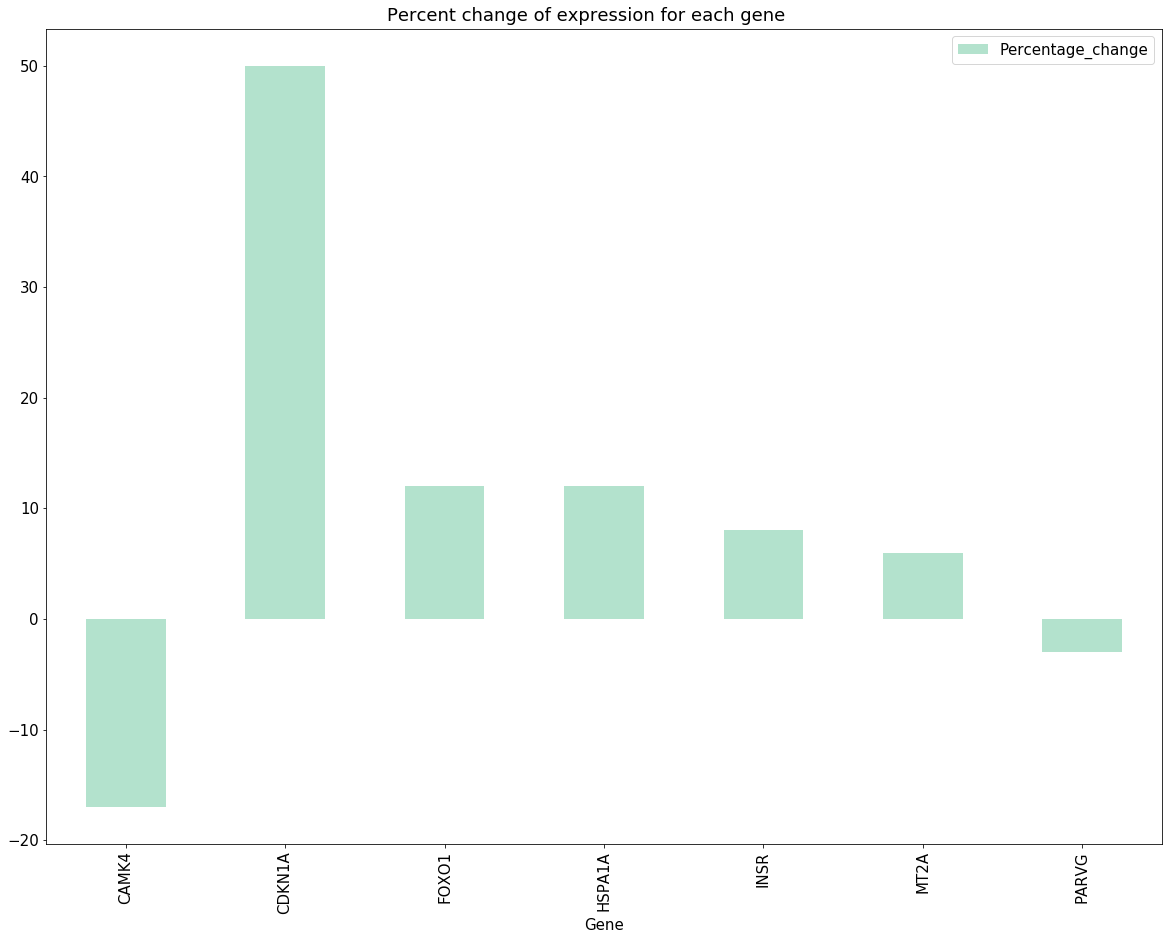

In [8]:
# Changing plot font size
plt.rcParams.update({'font.size': 15})

# Combining duplicate genes, since they have the same expression values
plotData = mergedData.groupby(['Gene']).sum()

# Reseting the index (so I can call Gene), creating a bar plot using Gene and Percentage_change, setting the color map,
# changing the size, and adding a title as a particular y coordinate
plotData.reset_index().plot(kind = 'bar', x = 'Gene', y = 'Percentage_change', cmap = 'Pastel2', figsize = (20, 
                                        15)).figure.suptitle("Percent change of expression for each gene", y = .9)

## Parsing out only genes from centenarians

In [9]:
over100 = mergedData[mergedData.Age_end > 100]

over100

,Change_name,Change_type,Species,Age_start,Age_end,Tissues,Gene,Type_of_data,Process_measured,Method_of_collection,Data_transforms,Percentage_change,P_value,References,Association,Population,Variants,PubMed
0,calcium/calmodulin-dependent protein kinase IV,molecular,Homo sapiens,26.0,106.0,Brain,CAMK4,equation,Gene Expression Level,Microarray,Log,-17.0,0.0009874102281749520000000,"2742: Lu et al. (2004) ""Gene regulation and DN...",significant,Italian,rs10491334,21612516
7,insulin receptor,molecular,Homo sapiens,26.0,106.0,Brain,INSR,equation,Gene Expression Level,Microarray,Log,8.0,0.0006839457392308250000000,"2742: Lu et al. (2004) ""Gene regulation and DN...",significant,Japanese,INSR,15582274


# Reference and PubMed articles for these genes

# Gene regulation and DNA damage in the ageing human brain
## https://www.nature.com/articles/nature02661
### Abstract
"The ageing of the human brain is a cause of cognitive decline in the elderly and the major risk factor for Alzheimer's disease. The time in life when brain ageing begins is undefined. Here we show that transcriptional profiling of the human frontal cortex from individuals __ranging from 26 to 106 years of age defines a set of genes with reduced expression after age 40.__ These genes play central roles in synaptic plasticity, vesicular transport and mitochondrial function. This is followed by induction of stress response, antioxidant and DNA repair genes. __DNA damage is markedly increased in the promoters of genes with reduced expression in the aged cortex.__ Moreover, these gene promoters are selectively damaged by oxidative stress in cultured human neurons, and show reduced base-excision DNA repair. Thus, __DNA damage may reduce the expression of selectively vulnerable genes involved in learning, memory and neuronal survival, initiating a programme of brain ageing that starts early in adult life.__"

# ---------------------------------------------------------------------------------------------------

# Association analysis between longevity in the Japanese population and polymorphic variants of genes involved in insulin and insulin-like growth factor 1 signaling pathways
## https://www.sciencedirect.com/science/article/abs/pii/S0531556504002736?via%3Dihub
### Abstract
"Recent studies have demonstrated a significant association between mutations in genes involved in the insulin/IGF1 signaling pathway and extension of the life span of model organisms. In this study which compared 122 Japanese semisupercentenarians (older than 105) with 122 healthy younger controls, we examined polymorphic variations of six genes which are involved in insulin/IGF1 signaling. These genes were FOXO1A, INSR, IRS1, PIK3CB, PIK3CG, and PPARGC1A. We investigated the possible association of each gene locus and longevity by haplotype-based association analyses using 18 SNPs from public databases and the published literature. __One INSR haplotype, which was comprised of 2 SNPs in linkage disequilibrium, was more frequent in semisupercentenarians than in younger controls.__"

# ---------------------------------------------------------------------------------------------------

# Association Study on Long-Living Individuals from Southern Italy Identifies rs10491334 in the CAMKIV Gene That Regulates Survival Proteins
## https://www.liebertpub.com/doi/10.1089/rej.2010.1114
### Abstract
"Long-living individuals (LLIs) are used to study exceptional longevity. A number of genetic variants have been found associated in LLIs to date, but further identification of variants would improve knowledge on the mechanisms regulating the rate of aging. Therefore, we performed a genome-wide association study on 410 LLIs and 553 young control individuals with a 317K single-nucleotide polymorphism (SNP) chip to identify novel traits associated with aging. Among the top (p < 1 × 10−4) SNPs initially identified, we found rs10491334 (CAMKIV) (odds ratio [OR] = 0.55; 95% confidence interval [CI] 0.42–0.73; p = 2.88 × 10−5), a variant previously reported associated with diastolic blood pressure, associated also in a replication set of 116 LLIs and 160 controls (OR = 0.54; 95% CI 0.32–0.90; p = 9 × 10−3). Furthermore, in vitro analysis established that calcium/calmodulin-dependent protein kinase IV (CAMKIV) activates the survival proteins AKT, SIRT1, and FOXO3A, and we found that homozygous carriers of rs10491334 have a significant reduction in CAMKIV expression. This, together with the observed reduction in minor-allele carriers among centenarians, points to a detrimental role for the SNP. In conclusion, __prolongevity genes are activated by CAMKIV, the levels of which are influenced by rs10491334, a SNP associated with human longevity.__"

## Parsing out only genes with abnormally high expression changes

In [10]:
express25 = mergedData[mergedData.Percentage_change > 25]

express25

,Change_name,Change_type,Species,Age_start,Age_end,Tissues,Gene,Type_of_data,Process_measured,Method_of_collection,Data_transforms,Percentage_change,P_value,References,Association,Population,Variants,PubMed
1,"cyclin-dependent kinase inhibitor 1A (p21, Cip1)",molecular,Homo sapiens,20.0,75.0,Skeletal Muscle,CDKN1A,equation,Gene Expression Level,Microarray,Log,50.0,3.92369813037324000E-8,"2828: Welle et al. (2004) ""Skeletal muscle gen...",significant,Italian,"rs1801270,rs1059234",20126416


# Reference and PubMed articles for this gene

# Skeletal muscle gene expression profiles in 20–29 year old and 65–71 year old women
## https://www.sciencedirect.com/science/article/abs/pii/S0531556503003322?via%3Dihub
### Abstract
"Gene expression profiling may provide leads for investigations of the molecular basis of functional declines associated with aging. In this study, high-density oligonucleotide arrays were used to probe the patterns of gene expression in skeletal muscle of seven young women (20–29 years old) and eight healthy older women (65–71 years old). The older subjects had reduced muscle mass, strength, and peak oxygen consumption relative to young women. There were ∼1000 probe sets that suggested differential gene expression in younger and older muscle according to statistical criteria. __The most highly overexpressed genes (>3-fold) in older muscle were p21 (cyclin-dependent kinase inhibitor 1A), which might reflect increased DNA damage,__ perinatal myosin heavy chain, which might reflect increased muscle fiber regeneration, and tomoregulin, which does not have a defined function in muscle. More than 40 genes encoding proteins that bind to pre-mRNAs or mRNAs were expressed at higher levels in older muscle. More than 100 genes involved in energy metabolism were expressed at lower levels in older muscle. In general, these results support previous observations on the differences in gene expression profiles between younger and older men."

# ---------------------------------------------------------------------------------------------------

# Identification of single nucleotide polymorphisms in the p21 (CDKN1A) gene and correlations with longevity in the Italian population
## https://www.aging-us.com/article/100041
### Abstract
"Longevity in humans is determined by multiple environmental and genetic factors. We have investigated possible associations between longevity and Single Nucleotide Polymorphisms (SNPs) in the p21 (CDKN1A) gene, a stress-inducible senescence-associated cell cycle inhibitor, expression of which upregulates genes implicated in several age-related diseases. By sequencing the promoter and exons of p21 in genomic DNA of ten individuals over 90 years old, we have identified 30 SNPs, many of which had not been previously characterized. A cluster of minor alleles within the -4547/-3489 bp region did not alter the basal activity or p53 responsiveness of the p21 promoter. We then compared the frequency of 41 p21 SNPs between 184 centenarians and 184 younger subjects in the Italian population. __Rare alleles of two exon-derived SNPs, rs1801270 and rs1059234, were significantly under-represented among the centenarians;__ no significant differences were found for 39 non-exonic SNPs. SNP rs1801270 causes Ser to Arg substitution at amino acid 31 and SNP rs1059234 leads to a nucleotide change in the 3'-untranslated region. Previous studies showed that the rare alleles of these two SNPs may play a role in cancer. These p21 alleles may be potentially detrimental to longevity and therefore are rare in centenarians."

# Conlusion:

## In the beginning, I started with a total of 4800 entries (550 from the Longevity dataset and 4250 from the Ageing Atlas dataset) and ended up with three genes of interest, after cleaning, parsing out entries without adequate data, combining the sets, and interpreting the results.

Fun sidenote: The three resulting genes are from Japan and Italy, which both have "Blue Zones"; areas around the world with a trend of consistently creating centenarians (people that live past 100 years old).